<a href="https://colab.research.google.com/github/APS4087/Credit_score_prediction_Model/blob/main/CreditScore_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**-----------------------Preprocessing--------------------------**

Loading libraries needed.....


In [1]:
install.packages(c("kohonen", "dummies", "ggplot2", "maptools", "sp", "reshape2", "rgeos","Hmisc"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“packages ‘dummies’, ‘maptools’, ‘rgeos’ are not available for this version of R

Versions of these packages for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
also installing the dependencies ‘checkmate’, ‘htmlwidgets’, ‘Rcpp’, ‘plyr’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘Formula’




Manual install of some packages


In [2]:
install.packages('dummies_1.5.6(1).tar.gz', repos = NULL, type="source")
install.packages('maptools_1.1-8(1).tar.gz', repos = NULL, type="source")
install.packages('rgeos_0.6-4(1).tar.gz', repos = NULL, type="source")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(kohonen)
library(dummies)
library(ggplot2)
library(sp)
library(maptools)
library(reshape2)
library(rgeos)
library(MASS)
library(Hmisc)

dummies-1.5.6 provided by Decision Patterns


Please note that 'maptools' will be retired during October 2023,
plan transition at your earliest convenience (see
https://r-spatial.org/r/2023/05/15/evolution4.html and earlier blogs
for guidance);some functionality will be moved to 'sp'.
 Checking rgeos availability: TRUE


Attaching package: ‘maptools’


The following object is masked from ‘package:sp’:

    sp2Mondrian


rgeos version: 0.6-4, (SVN revision 699)
 GEOS runtime version: 3.11.1-CAPI-1.17.1 
 Please note that rgeos will be retired during October 2023,
plan transition to sf or terra functions using GEOS at your earliest convenience.
See https://r-spatial.org/r/2023/05/15/evolution4.html for details.
 GEOS using OverlayNG
 Linking to sp version: 2.1-3 
 Polygon checking: TRUE 



Attaching package: ‘Hmisc’


The following object is masked from ‘package:rgeos’:

    translate


The following object is masked from ‘package:maptools’:

    label


The following objects are masked

**Color Palette installation**

In [4]:
pretty_palette <- c("#1f77b4", '#ff7f0e', '#2ca02c', '#d62728',
'#9467bd', '#8c564b', '#e377c2')

#**----------------------Data Preparing----------------------------**

Loading data into data frame

In [4]:
data <- read.csv("creditworthiness.csv")

Checking data input

In [6]:
head(data)

,functionary,re.balanced..paid.back..a.recently.overdrawn.current.acount,FI3O.credit.score,gender,X0..accounts.at.other.banks,credit.refused.in.past.,years.employed,savings.on.other.accounts,self.employed.,max..account.balance.12.months.ago,⋯,max..account.balance.3.months.ago,min..account.balance.3.months.ago,avrg..account.balance.3.months.ago,max..account.balance.2.months.ago,min..account.balance.2.months.ago,avrg..account.balance.2.months.ago,max..account.balance.1.months.ago,min..account.balance.1.months.ago,avrg..account.balance.1.months.ago,credit.rating
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,1,0,0,4,1,3,3,1,4,⋯,2,1,2,5,2,5,1,5,4,0
2,0,0,1,0,1,0,5,2,1,3,⋯,3,2,1,5,5,5,4,4,1,0
3,0,1,0,1,4,0,3,3,1,5,⋯,3,1,3,3,5,5,5,3,2,0
4,0,1,0,0,5,0,1,1,0,2,⋯,4,4,5,5,5,3,1,1,4,0
5,1,1,1,0,2,0,1,1,0,1,⋯,5,2,5,1,3,4,2,5,5,2
6,0,1,1,1,2,0,1,1,1,1,⋯,3,2,5,5,3,4,3,5,3,2


By scanning through the data we can see that some data fields have missing values. These can make the prediction task abit difficult as we don't have accurate data to make sure our predictions are correct.

In [5]:
idcol = "functionary"

In [6]:
names(data)[1] <- "functionary"

The describe() method generates a contingency table that offers insights into the dataset under analysis. Its output varies depending on the type of data being examined. While the mean serves as the measure of central tendency for all numeric datasets, vectors receive additional information such as the median and other quantiles. The function also calculates the Gmd value, which combines deviation and variance details. Notably, it treats the response variable like any other value, without distinct treatment, but includes it in the sampling process


In [9]:
describe(data)

data 

 46  Variables      2500  Observations
--------------------------------------------------------------------------------
functionary 
       n  missing distinct     Info      Sum     Mean      Gmd 
    2500        0        2    0.603      696   0.2784   0.4019 

--------------------------------------------------------------------------------
re.balanced..paid.back..a.recently.overdrawn.current.acount 
       n  missing distinct     Info      Sum     Mean      Gmd 
    2500        0        2    0.379     2129   0.8516   0.2529 

--------------------------------------------------------------------------------
FI3O.credit.score 
       n  missing distinct     Info      Sum     Mean      Gmd 
    2500        0        2    0.444     2049   0.8196   0.2958 

--------------------------------------------------------------------------------
gender 
       n  missing distinct     Info      Sum     Mean      Gmd 
    2500        0        2     0.75     1235    0.494   0.5001 

-------------

It has been observed that in the unclassified data, the credit rating field is absent, indicated by a value of 0. Since these records lack crucial information for model training and testing purposes, they will be excluded from further analysis.

Those with data 0 values are stored in unknownData incase needed for prediction task.

In [7]:
classifiedData = subset(data, data[,46] >0 )
unknownData = subset(data, data[,46] ==0 )

To identify the attributes that strongly influence the final credit rating, I utilize the cor() function to compute correlations, followed by the analysis of heatmaps using SOM maps. This approach allows me to visually inspect the clustering of data and confirm the selection of significant parameters for the analysis.

**Generating Coorelation Table**

In [11]:
cTable = abs(cor(classifiedData, y = classifiedData$credit.rating))

In [12]:
sorted_cTable = cTable[order(cTable, decreasing = TRUE),,drop = FALSE]

**Viewing the coorelation table generated**

In [13]:
head(sorted_cTable, 8)

credit.rating,1.00000000
functionary,0.31728279
FI3O.credit.score,0.27988701
re.balanced..paid.back..a.recently.overdrawn.current.acount,0.21822314
credit.refused.in.past.,0.21783847
gender,0.07223229
max..account.balance.11.months.ago,0.04948934
avrg..account.balance.6.months.ago,0.04535846


In the above produced coorelation table we can see the features sorted from highest to lowest coorelation with credit rating.
I took out gender as a feature because with logical thinking gender should affect credit rating.
So to train the model I selected


1.   Functionary
2.   Fl30 credit score
3.   re-balanced paid back
4.   credit refused in past
5.   max account balance 11 months ago



**Reason for checking each of the features**

*1. functionary*

> The functionary can affect the credit score as being functionary example having an normal income means money will be inputed into the bank regularly.


*2. Fl30 credit score*

> This refers to the credit score model used by some financial institutions. Different credit scoring models may weigh factors differently, leading to variations in credit scores. Understanding the specific model and its criteria is crucial for assessing creditworthiness accurately.


*3. re-balanced (paid back) a recently overdrawn current accoutn*

> Overdrafts can indicate financial instability or mismanagement. By promptly repaying the overdraft, the individual demonstrates responsibility and commitment to managing their finances, potentially improving their credit score.

*4. Credit refused in the past*

> Previous credit refusals can negatively impact one's credit score, as they suggest a higher risk to lenders. Repeated rejections may indicate financial distress or poor credit management, leading lenders to be more cautious when extending credit.

*5. Max account balance 11 months ago*

> Maintaining a high balance in an account can demonstrate financial stability and the ability to manage money effectively. However, sudden fluctuations or a consistently maxed-out balance may raise concerns about overreliance on credit or inability to manage expenses, potentially affecting creditworthiness.







**---------------------------SOM TRAINING------------------------------**

 I prepare a trained dataset for further analysis, employing visualization techniques to affirm and summarize the findings. Visualization aids in conducting a more comprehensive analysis and understanding the relationships within the data.

The dataset is subjected to the SOM model, a clustering and data visualization technique rooted in neural network principles. The objective of SOM is to identify a collection of reference vectors and assign each data object to the centroid that best approximates it. Each centroid corresponds to a neuron, and during processing, data objects are sequentially evaluated and matched with the closest centroid, with neighboring centroids also adjusted. This iterative process continues until a predetermined threshold is reached or centroids stabilize. The outcome is a set of centroids that delineate clusters within the dataset.

**Checking the columns for the chosen feature**

Seeing where the datas are in dataframe.

In [14]:
column_names <- names(data)
print(column_names)

 [1] "functionary"                                                
 [2] "re.balanced..paid.back..a.recently.overdrawn.current.acount"
 [3] "FI3O.credit.score"                                          
 [4] "gender"                                                     
 [5] "X0..accounts.at.other.banks"                                
 [6] "credit.refused.in.past."                                    
 [7] "years.employed"                                             
 [8] "savings.on.other.accounts"                                  
 [9] "self.employed."                                             
[10] "max..account.balance.12.months.ago"                         
[11] "min..account.balance.12.months.ago"                         
[12] "avrg..account.balance.12.months.ago"                        
[13] "max..account.balance.11.months.ago"                         
[14] "min..account.balance.11.months.ago"                         
[15] "avrg..account.balance.11.months.ago"                    

*Feature found at column 1,2,3,6,13*

In [8]:
interestedFeatures <- data[, c(1,2,3,6,13)]

#**--------------DATA TRAINING--------------------**

In [16]:
data_train <- classifiedData[, c(1:45)]

*Train the SOM using Kohonen method*

Using a grid of 20x20 to make visulizing easier.

In [17]:
data_train_matrix <- as.matrix(scale(data_train))
names(data_train_matrix) <- names(data_train)
require(kohonen)
x_dim=40
y_dim=40

smallAreas <- FALSE
if(smallAreas){
  #larger grid for the small areas example (more samples)
  somGrid <- somgrid(xdim = x_dim, ydim = y_dim, topo = "hexagonal")
}else{
  somGrid <- somgrid(xdim = x_dim/2, ydim = y_dim/2, topo = "hexagonal")
}

**Start Training**

In [18]:
if(packageVersion("kohonen")<3){
  system.time(somModel <- som(data_train_matrix, grid=somGrid, rlen=1000, alpha=c(0.9, 0.01), n.hood="circular", keep.data = TRUE))
}else{
  system.time(somModel <- som(data_train_matrix, grid=somGrid, rlen=1000, alpha=c(0.9, 0.01), mode= "online", normalizeDataLayers=false, keep.data = TRUE))
}


   user  system elapsed 
 63.667   0.025  64.071 

*Summary Report on the SOM model*

In [19]:
summary(somModel)

SOM of size 20x20 with a hexagonal topology and a bubble neighbourhood function.
The number of data layers is 1.
Distance measure(s) used: sumofsquares.
Training data included: 1962 objects.
Mean distance to the closest unit in the map: 22.972.


Removing somGrid and data_train_matrix from the R environment

In [20]:
rm(somGrid, data_train_matrix)

#**------------------SOM VISUALISATION--------------------------**

SOM = UNSUPERVISED CLUSTERING MODEL

Importing coolBlueHotRed color palette

In [21]:
source('coolBlueHotRed.R')

Plot on the process of training

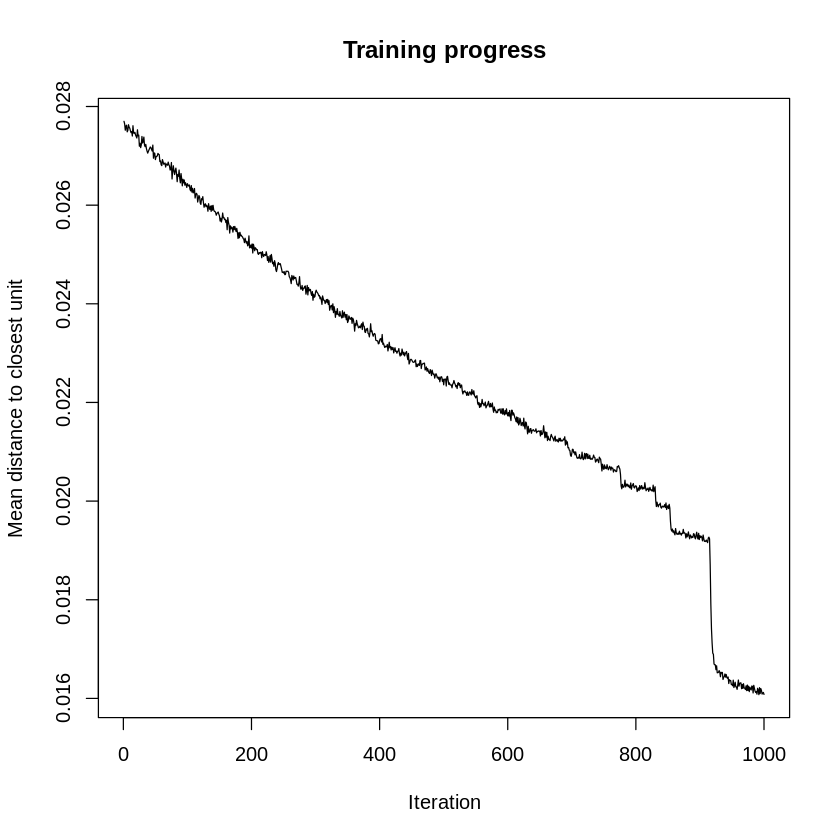

In [22]:
plot(somModel, type = "changes")

*Plotting the heatmap for a variable at scaled / normalised values*


>This plot illustrates the evolution of the model during training, highlighting the gradual stabilization of the node distance over time.



**1. Functionary**

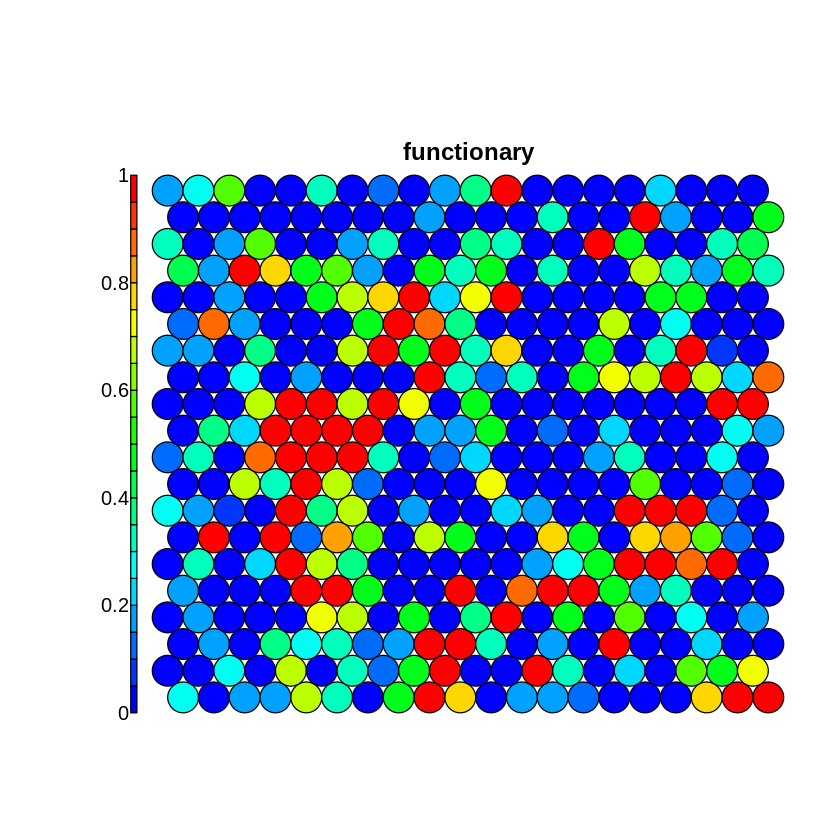

In [23]:
var <- 1
var_unscaled <- aggregate(as.numeric(data_train[,var]),
by=list(somModel$unit.classif), FUN=mean, simplify=TRUE)[,2]
plot(somModel, type = "property", property=var_unscaled, main=names(data_train)[var], palette.name=coolBlueHotRed)
rm(var_unscaled, var)

*We can clearly see the clustering is between 0 to 0.2*

**2. Rebalanced (Paid back)**

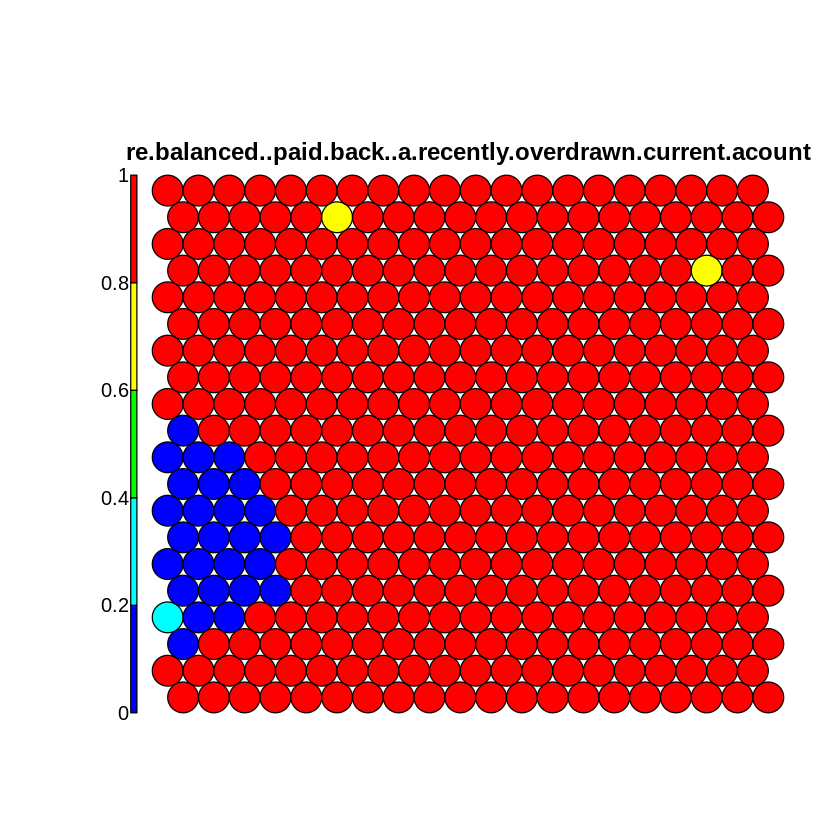

In [24]:
var <- 2
var_unscaled <- aggregate(as.numeric(data_train[,var]),
by=list(somModel$unit.classif), FUN=mean, simplify=TRUE)[,2]
plot(somModel, type = "property", property=var_unscaled, main=names(data_train)[var], palette.name=coolBlueHotRed)
rm(var_unscaled, var)

*We can clearly see the clustering is mostly on 1*

**3. FI30 Credit Score**

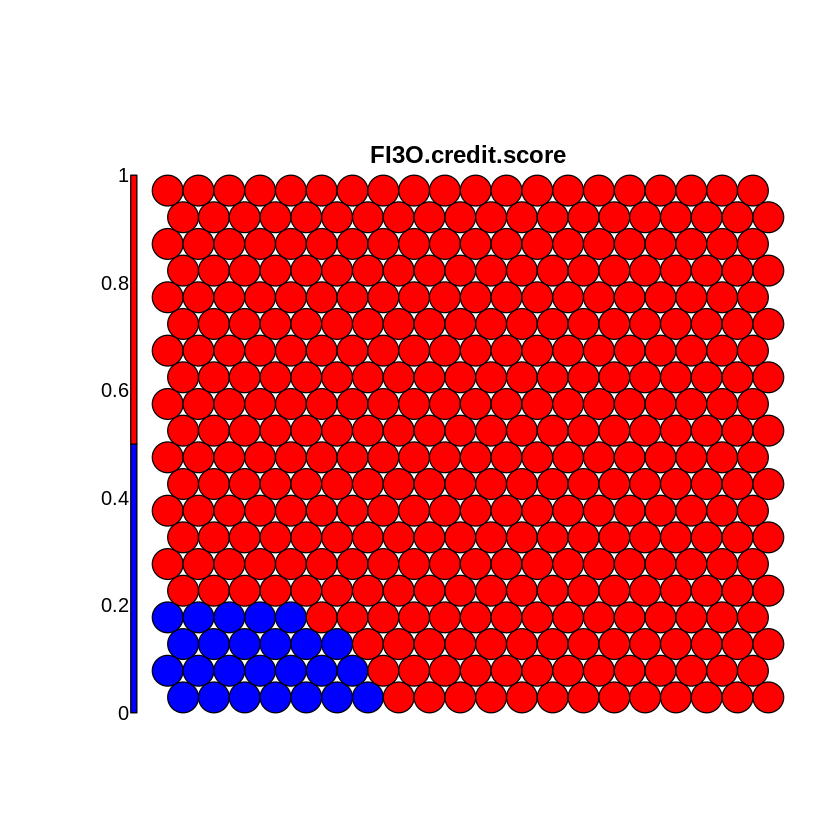

In [25]:
var <- 3
var_unscaled <- aggregate(as.numeric(data_train[,var]),
by=list(somModel$unit.classif), FUN=mean, simplify=TRUE)[,2]
plot(somModel, type = "property", property=var_unscaled, main=names(data_train)[var], palette.name=coolBlueHotRed)
rm(var_unscaled, var)

*We can clearly see the clustering is mostly on 1 to 0.6*

**4. Credit Refused in the Past**





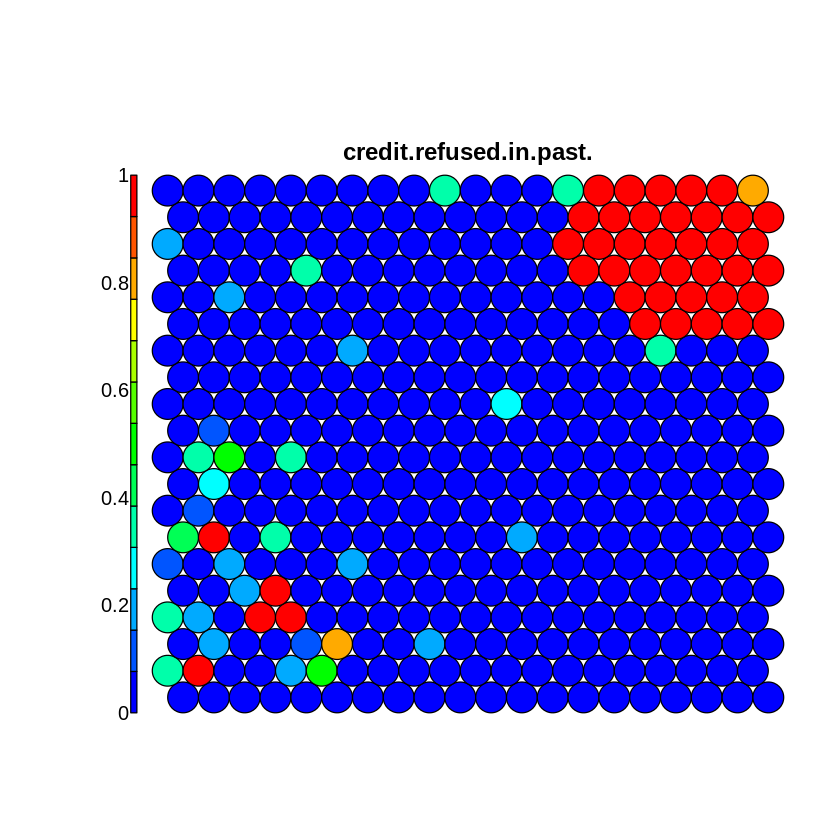

In [26]:
var <- 6
var_unscaled <- aggregate(as.numeric(data_train[,var]),
by=list(somModel$unit.classif), FUN=mean, simplify=TRUE)[,2]
plot(somModel, type = "property", property=var_unscaled, main=names(data_train)[var], palette.name=coolBlueHotRed)
rm(var_unscaled, var)

*We can clearly see the clustering is mostly at 0*

**5. Max Account Balance 11 month ago**

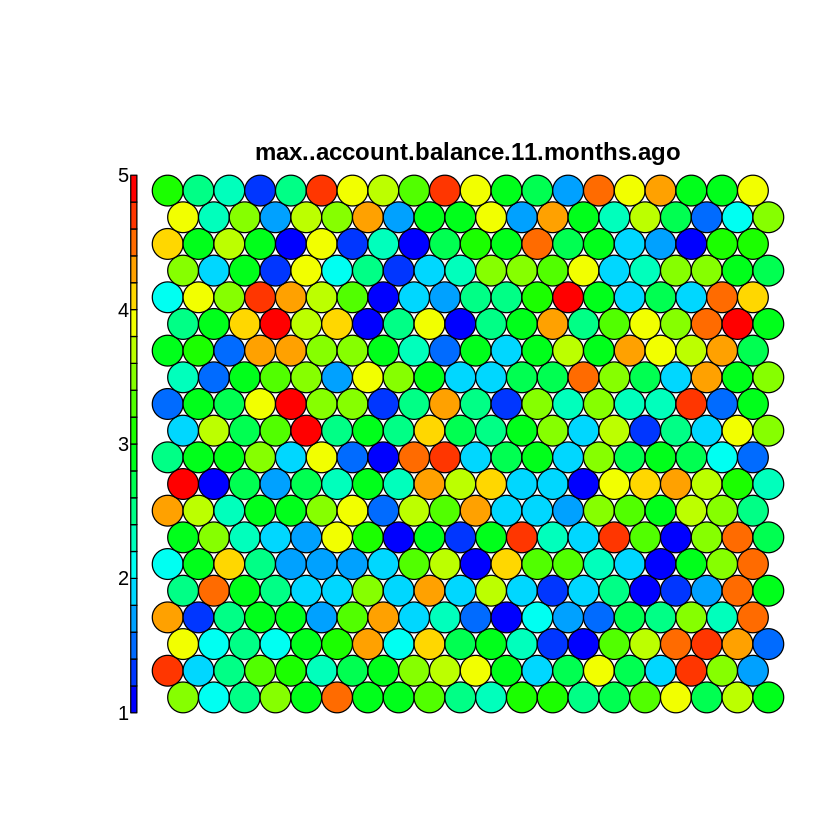

In [27]:
var <- 13
var_unscaled <- aggregate(as.numeric(data_train[,var]),
by=list(somModel$unit.classif), FUN=mean, simplify=TRUE)[,2]
plot(somModel, type = "property", property=var_unscaled, main=names(data_train)[var], palette.name=coolBlueHotRed)
rm(var_unscaled, var)

*We can clearly see the clustering is around 3*

#**Clustering SOM Results**

*Elbow diagram*

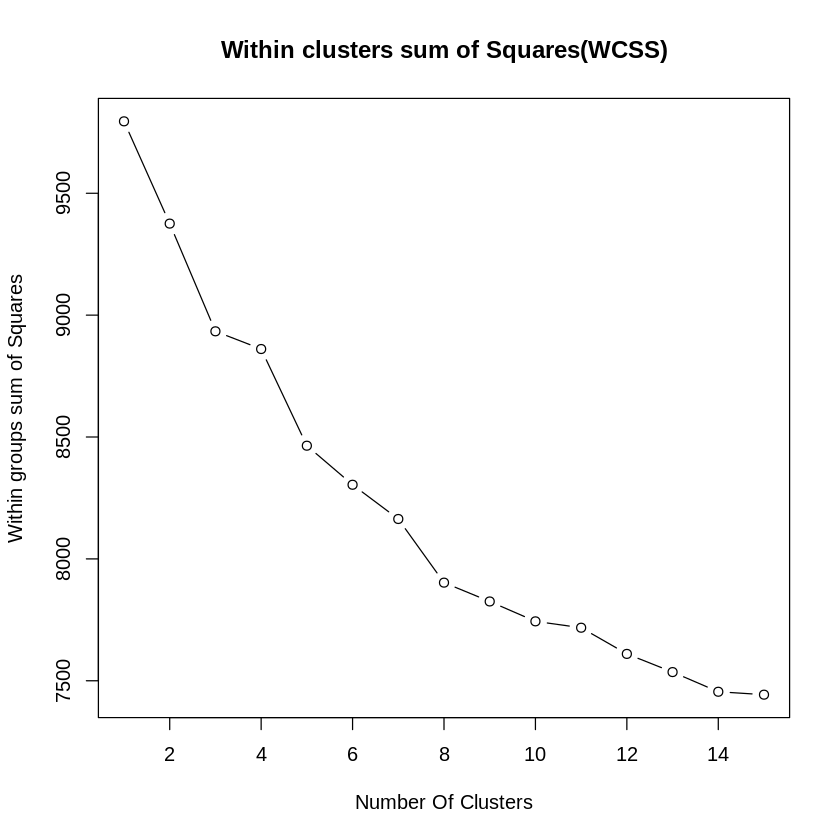

In [29]:
myData <- matrix(unlist(somModel$codes), ncol=length(data_train), byrow = FALSE)
wss <- (nrow(myData)-1) * sum(apply(myData, 2, var))

for(i in 2:15)
  wss[i] <- sum(kmeans(myData, centers = i)$withinss)

par(mar=c(5.1, 4.1, 4.1, 2.1))
plot(1:15, wss, type = "b", xlab="Number Of Clusters", ylab = "Within groups sum of Squares", main = "Within clusters sum of Squares(WCSS)")

As the number of clusters increases, the within-cluster sum of squares decreases, indicating improved fit. The changes become minimal starting from 8 onwards forming a elbow shape. Hence, 8 should be optimal k means.However, choosing 8 clusters for a task with only 3 credit rating classes may lead to overfitting. In such cases, the prediction model won't achieve 100% accuracy as it's attempting to predict fewer categories than the number of clusters. Careful consideration is needed to ensure clustering aligns with the predictive task and that its features enhance rather than hinder model performance.

*Sticking with 3 clusters for consistency (credit score only have 3 groups)*

In [30]:
somCluster <- cutree(hclust(dist(myData)), 3)

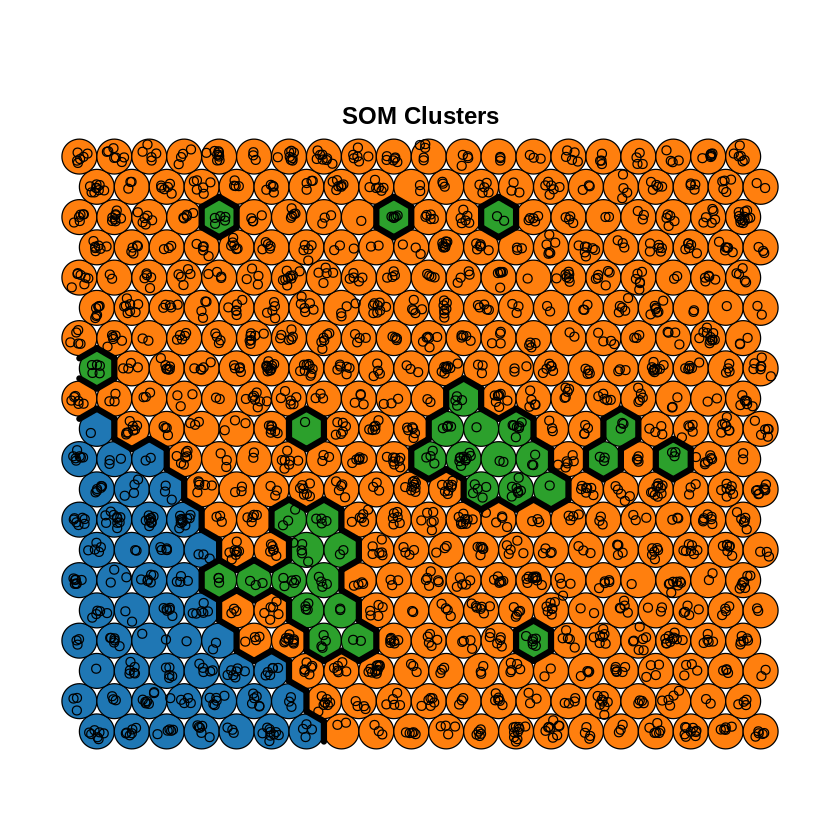

In [31]:
plot(somModel, type="mapping", bgcol = pretty_palette[somCluster], main = "SOM Clusters")
add.cluster.boundaries(somModel, somCluster)

CREDIT SCORE 1,2,3

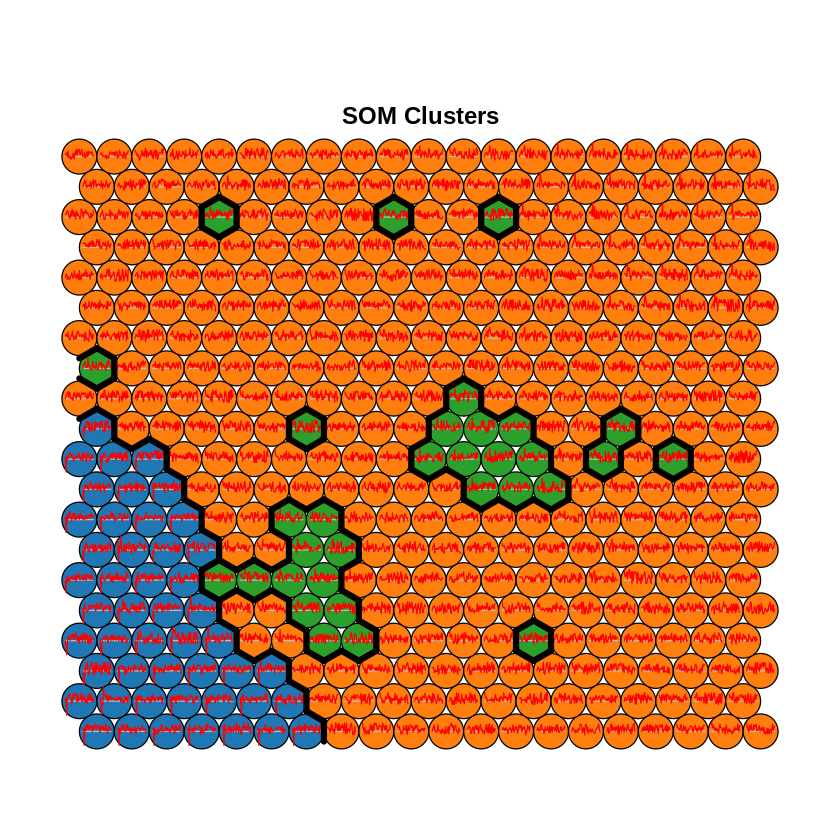

In [32]:
plot(somModel, type="codes", bgcol = pretty_palette[somCluster], main = "SOM Clusters")
add.cluster.boundaries(somModel, somCluster)

From the analysis conducted until now, it becomes evident that achieving a 100% prediction accuracy in credit rating is challenging due to several reasons:


*   **Incomplete Data**: Some variables, such as Savings in other banks, contain missing data, which hinders a comprehensive analysis and may lead to biased conclusions.

*   **Limited Relevant Features**: The dataset may lack a sufficient number of variables closely correlated with the credit rating. This scarcity restricts the model's ability to capture the full complexity of factors influencing creditworthiness.

*   **Discrepancy Between Logic and Statistics**: While certain variables, like gender, may seem logically irrelevant to credit ratings, statistical analysis, such as clustering, may reveal unexpected patterns or correlations that challenge conventional assumptions.






#**MLP MODEL TRAINING**

In [1]:
install.packages("RSNNS")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Some trail and error methods used such as neuralnet library. Due to time limit of this assignment decided just to use RSNNS. Since I need to get more knownledge on these methods.

In [ ]:
install.packages("neuralnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Deriv’




In [2]:
library(RSNNS)

Loading required package: Rcpp



In [9]:
head(interestedFeatures)

,functionary,re.balanced..paid.back..a.recently.overdrawn.current.acount,FI3O.credit.score,credit.refused.in.past.,max..account.balance.11.months.ago
,<int>,<int>,<int>,<int>,<int>
1,1,1,0,1,3
2,0,0,1,0,2
3,0,1,0,0,3
4,0,1,0,0,4
5,1,1,1,0,2
6,0,1,1,0,5


storing the columns indexes

In [10]:
interestedFeaturesList = c (1,2,3,6,13)

In [11]:
head(interestedFeaturesList)

[1]  1  2  3  6 13

Extracting the training values and unknown values based on the selected features

In [12]:
trainValues = classifiedData[,interestedFeaturesList]
unknownValues = unknownData[,interestedFeaturesList]

In [13]:
head(trainValues)
head(unknownValues)

,functionary,re.balanced..paid.back..a.recently.overdrawn.current.acount,FI3O.credit.score,credit.refused.in.past.,max..account.balance.11.months.ago
,<int>,<int>,<int>,<int>,<int>
5,1,1,1,0,2
6,0,1,1,0,5
7,0,1,1,0,1
8,0,1,1,0,5
9,1,1,1,0,3
10,0,1,1,0,5


,functionary,re.balanced..paid.back..a.recently.overdrawn.current.acount,FI3O.credit.score,credit.refused.in.past.,max..account.balance.11.months.ago
,<int>,<int>,<int>,<int>,<int>
1,1,1,0,1,3
2,0,0,1,0,2
3,0,1,0,0,3
4,0,1,0,0,4
11,0,1,1,0,2
13,1,0,1,0,2


Using decodeClassLabels() to decode class labels from a numerical or levels vector to a binary matrix

In [14]:
trainingTargets <- decodeClassLabels(classifiedData[, 46])
head(trainingTargets)

1,2,3
0,1,0
0,1,0
0,1,0
0,1,0
1,0,0
0,0,1


To maximize the accuracy of predicting the credit rating I am going to split
the dataset into training and test sets with a ratio of 0.2, which typically means 80% of the data is used for training and 20% for testing. This strategy is known as train-test split. This strategy works because


*  **Minimizing Overfitting:** By reserving a portion of the dataset for testing, the model is evaluated on unseen data, preventing overfitting. Overfitting occurs when the model learns the training data too well, including noise and outliers, and performs poorly on new data. The test set serves as an independent validation, ensuring the model's generalization ability.


*  **Assessing Generalization:** The test set provides an unbiased estimate of the model's performance on unseen data. This assessment helps gauge how well the model can generalize to new instances beyond the training data. Maximizing generalization is crucial for accurate predictions in real-world scenarios.


* **Hyperparameter Tuning:** The split allows for the tuning of hyperparameters without contaminating the test set. Hyperparameters are configuration settings that control the learning process (e.g., learning rate, regularization). By using the training set for hyperparameter tuning and validation, the model's performance can be optimized while maintaining the integrity of the test set.



In [15]:
trainSet <- splitForTrainingAndTest(trainValues, trainingTargets, ratio = 0.2)

Normalize the training data set

In [16]:
trainSet <- normTrainingAndTestSet(trainSet)

**Define and training the MLP MODEL**

In [50]:
model <- mlp(
  trainSet$inputsTrain,
  trainSet$targetsTrain,
  size = c(20),
  learnFuncParams = c(0.001),
  maxit = 500,
  inputsTest = trainSet$inputsTest,
  targetsTest = trainSet$targetsTest
)

In [18]:
testSetPrediction = predict(model, trainSet$inputsTest)

In [19]:
head(testSetPrediction)

0.5703003,0.3610742,0.1135046
0.5621875,0.3373039,0.1262537
0.5480605,0.3173600,0.1417740
0.1659597,0.6321917,0.1891267
0.1606499,0.6218814,0.2015608
0.5558904,0.3268466,0.1336409


In [20]:
unknownSetPrediction = predict(model, unknownValues)

In [21]:
head(unknownSetPrediction)

1,0.3281994,0.3404055,0.24883009
2,0.2605018,0.5779687,0.14965908
3,0.2414550,0.5035768,0.21739142
4,0.2320321,0.4855513,0.23726155
11,0.3573348,0.6391859,0.09853163
13,0.4543380,0.4374517,0.12326591


In [ ]:
head(fitted.values(model))

0.5683106,0.3481041,0.1172264
0.1559529,0.6089221,0.2136727
0.1782757,0.6510544,0.1693529
0.1559529,0.6089221,0.2136727
0.5625550,0.3359558,0.1245402
0.1559529,0.6089221,0.2136727


Producing Confusion Matrix

In [36]:
cm_train <- confusionMatrix(trainSet$targetsTrain, fitted.values(model))
cm_test <- confusionMatrix(trainSet$targetsTest, testSetPrediction)
cm_train
cm_test

       predictions
targets   1   2   3
      1 215 146  16
      2 123 596  63
      3  42 216 152

       predictions
targets   1   2   3
      1  66  36   4
      2  37 141  10
      3  13  53  33

Calculating the Accuracy

In [38]:
calculate_accuracy <- function(cm) {
  correct_predictions <- sum(diag(cm))
  total_predictions <- sum(cm)
  accuracy <- (correct_predictions / total_predictions) * 100
  return(accuracy)
}
train_accuracy <- calculate_accuracy(as.matrix(cm_train))
test_accuracy <- calculate_accuracy(as.matrix(cm_test))

print(paste("Training Accuracy:", train_accuracy, "%"))
print(paste("Test Accuracy:", test_accuracy, "%"))

[1] "Training Accuracy: 61.376673040153 %"
[1] "Test Accuracy: 61.0687022900763 %"


In [25]:
head(trainingTargets)
head(classifiedData[,46])
head(unknownSetPrediction)

1,2,3
0,1,0
0,1,0
0,1,0
0,1,0
1,0,0
0,0,1


[1] 2 2 2 2 1 3

1,0.3281994,0.3404055,0.24883009
2,0.2605018,0.5779687,0.14965908
3,0.2414550,0.5035768,0.21739142
4,0.2320321,0.4855513,0.23726155
11,0.3573348,0.6391859,0.09853163
13,0.4543380,0.4374517,0.12326591


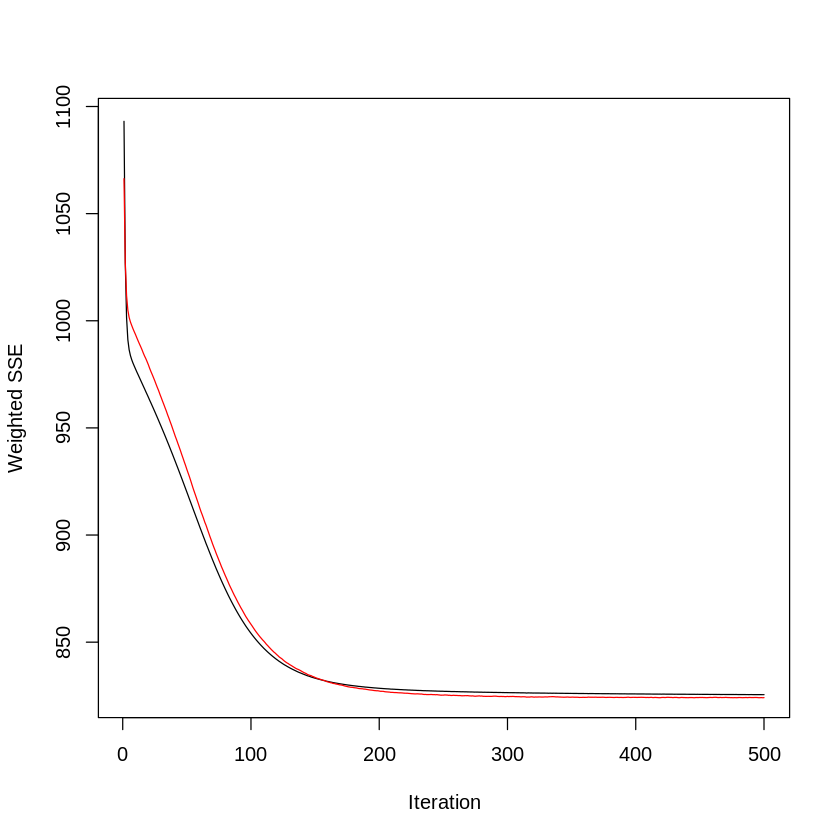

In [46]:
plotIterativeError(model)

> The plot illustrates the iteration error of the prediction model. Both the red and black lines demonstrate a consistent and substantial decrease over iterations. This indicates that the predictions made on the validation set closely mirror those on the training set. The strong decreasing trend suggests that the model is progressively improving its performance with each iteration, converging towards accurate predictions. This alignment between training and validation set predictions underscores the model's ability to generalize well to unseen data



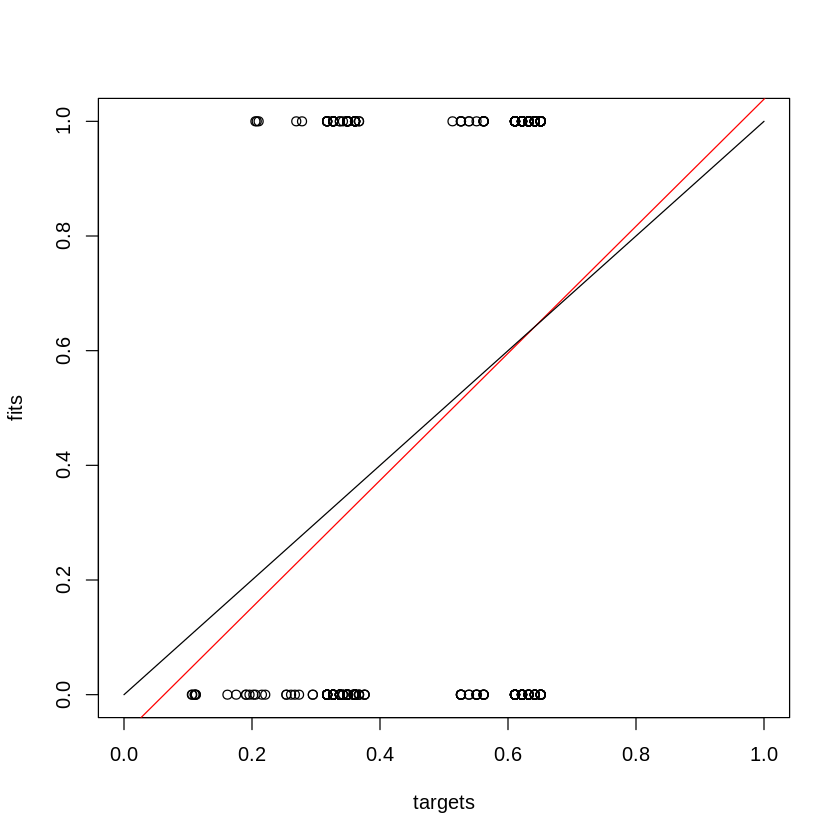

In [47]:
plotRegressionError(testSetPrediction[,2], trainSet$targetsTest[,2])



> The plot visualizes the regression error of the predictive model. The proximity of the linear fit to the optimal line suggests that the model's output closely aligns with the target values. This indicates that the predictions made by the model exhibit a strong correspondence to the actual dataset. The close resemblance between the linear fit and the optimal line indicates that the model achieves a high level of accuracy in capturing the underlying patterns and relationships present in the data



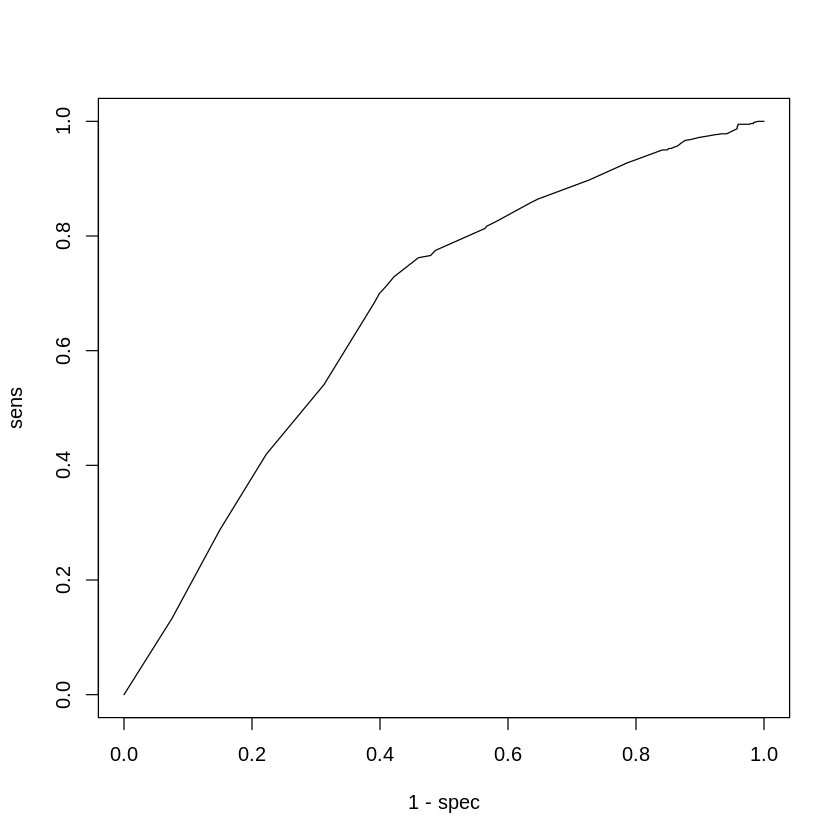

In [48]:
plotROC(fitted.values(model)[,2], trainSet$targetsTrain[,2])



> The plot illustrates the prediction model's Area under the ROC Curve (AUC) based on the training set. The AUC reflects the model's ability to distinguish between different classes, with higher values indicating better performance. The balanced positioning of the ROC curve indicates that the model is neither underfitting nor overfitting the dataset. This suggests that the model has learned the underlying patterns in the training data effectively without memorizing noise. Consequently, there is a higher likelihood that the model's accuracy will be maintained when applied to the test set, as it demonstrates a robust performance across different datasets.



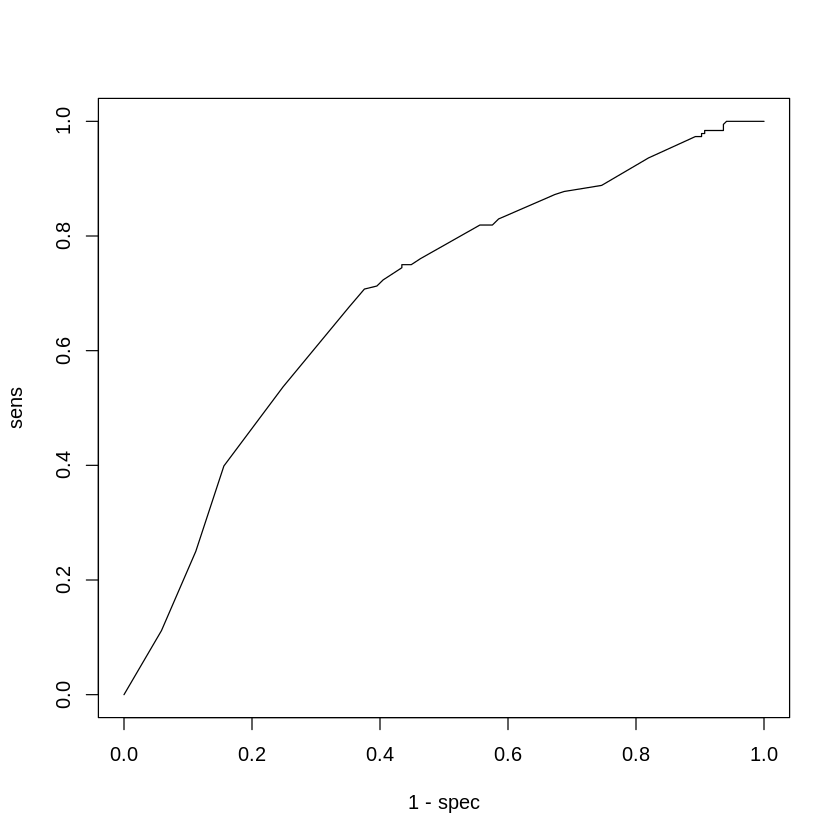

In [49]:
plotROC(testSetPrediction[,2],trainSet$targetsTest[,2])



> The plot depicts the Area under the ROC Curve (AUC) based on the test set. The AUC serves as a measure of the model's ability to discriminate between different classes, with higher values indicating superior performance. The observed AUC suggests that the predictions made on the test set outperformed those on the validation set. This can be attributed to the model's ability to generalize well to unseen data. By not overtraining on the training dataset, the model maintains a balance between capturing underlying patterns and avoiding memorization of noise. Consequently, it exhibits enhanced flexibility, enabling it to adapt more effectively to the nuances present in the test set. This robust generalization capability empowers the model to make more accurate predictions on unseen data, thereby improving its overall performance

